In [2]:
from bs4 import BeautifulSoup
import requests
import re

In [3]:
url="https://www.thehindu.com/latest-news/"
page=requests.get(url)

s1=BeautifulSoup(page.content,"html")
s2=BeautifulSoup(s1.prettify(),"html")

In [4]:
headline=s2.find_all("h3")
headline[:5]

[<h3 class="title">
 <a href="https://www.thehindu.com/news/national/karnataka/no-threat-of-drinking-water-shortage-in-mysuru-this-summer/article69278816.ece">
               ‘No threat of drinking water shortage in Mysuru this summer’
              </a>
 </h3>,
 <h3 class="title">
 <a href="https://www.thehindu.com/news/cities/Coimbatore/de-addiction-centre-inaugurated-at-coimbatore-medical-college-hospital/article69279017.ece">
               De-addiction centre inaugurated at Coimbatore Medical College Hospital
              </a>
 </h3>,
 <h3 class="title">
 <a href="https://www.thehindu.com/news/national/hope-and-despair-at-the-homes-of-workers-trapped-in-uttarakhand-avalanche/article69278766.ece">
               Hope and despair at the homes of workers trapped in Uttarakhand avalanche
              </a>
 </h3>,
 <h3 class="title">
 <a href="https://www.thehindu.com/news/national/andhra-pradesh/andhra-pradesh-chief-minister-chandrababu-naidu-disburses-pension-under-ntr-bharosa-sche

In [5]:
major_headlines=[i.text.strip() for i in headline]
major_headlines

['‘No threat of drinking water shortage in Mysuru this summer’',
 'De-addiction centre inaugurated at Coimbatore Medical College Hospital',
 'Hope and despair at the homes of workers trapped in Uttarakhand avalanche',
 'Andhra Pradesh Chief Minister Chandrababu Naidu disburses pension under NTR Bharosa scheme',
 'NABARD projects credit outflow of ₹34,090 crore for Salem district',
 'FAPCCI welcomes focus on inclusive growth in  Andhra Pradesh Budget',
 'Liberian national arrested for running brothel, four women from Uganda and Kenya rescued',
 'Barriers put up to check dumping of waste into canals in Tiruchi',
 'Farmers stage protest against the Railways move to close second railway gate at Jeeyapuram',
 'Kerala’s first ‘We Park’ opens in Kollam',
 'Artificial limbs donated to 100 persons',
 'Himachal Pradesh to terminate services of govt. employees found guilty of involvement in drug trade',
 'Ward delimitation: hearing for petitioners in nine local bodies postponed to March 17',
 '25

In [6]:
import nltk 
from nltk.corpus import stopwords

In [7]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(list(stop_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ittismita/nltk_data...


['needn', 'to', 'from', 'hasn', 'her', "she's", 'ours', 'on', 'couldn', "mustn't", "they'd", 'was', 'over', "don't", "weren't", 'again', 'while', "i'd", 'into', 'up', 'does', 'me', 'once', 'until', "shan't", 'who', 'she', 'm', "hadn't", 'weren', 'am', 'more', 'where', 'only', 'as', 'being', "it'd", "should've", "hasn't", 'you', 't', 'himself', "we'll", 'about', "didn't", 'above', 'hadn', 'down', 'ourselves', 'through', 'out', "he'd", "they're", "mightn't", 'theirs', 'isn', 'him', 'such', 'did', 'nor', 'which', "wouldn't", "you're", 'but', 'them', 'how', 'what', "needn't", 'its', 'for', "isn't", 'all', 'ma', 'if', 'or', 'shouldn', 'their', 'y', 'themselves', 'those', 'can', 'doing', 's', 'than', 'yourself', "we'd", 'with', "aren't", 'by', 'then', 'there', 'a', 'too', "i'm", "that'll", 'he', 'should', 'i', 'very', "couldn't", "they've", 'has', "she'd", 'this', 'under', 'some', 'no', 'it', 'your', "wasn't", "won't", "it's", 'whom', "he'll", 'ain', 'both', 'were', 'myself', 'are', 'aren', 

[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
# cleaning headlines
def cleaned(text):
    text=text.lower()
    #text=re.sub(r'\s+','',text)#remove extra spaces
    text=re.sub(r'[^\w\s]','',text)#remove punctuations
    return text.strip()


cleaned_headlines= [cleaned(i) for i in major_headlines]
cleaned_headlines
    
    

['no threat of drinking water shortage in mysuru this summer',
 'deaddiction centre inaugurated at coimbatore medical college hospital',
 'hope and despair at the homes of workers trapped in uttarakhand avalanche',
 'andhra pradesh chief minister chandrababu naidu disburses pension under ntr bharosa scheme',
 'nabard projects credit outflow of 34090 crore for salem district',
 'fapcci welcomes focus on inclusive growth in  andhra pradesh budget',
 'liberian national arrested for running brothel four women from uganda and kenya rescued',
 'barriers put up to check dumping of waste into canals in tiruchi',
 'farmers stage protest against the railways move to close second railway gate at jeeyapuram',
 'keralas first we park opens in kollam',
 'artificial limbs donated to 100 persons',
 'himachal pradesh to terminate services of govt employees found guilty of involvement in drug trade',
 'ward delimitation hearing for petitioners in nine local bodies postponed to march 17',
 '25 injured at

In [9]:
# removing stopwords
def cleaned_nltk(text):
    sent=[]
    words=text.split()
    for x in words:
        
        if x not in stop_words:
            sent.append(x)
    return ' '.join(sent)

cleaned_headline= [cleaned_nltk(i) for i in cleaned_headlines]
cleaned_headline

['threat drinking water shortage mysuru summer',
 'deaddiction centre inaugurated coimbatore medical college hospital',
 'hope despair homes workers trapped uttarakhand avalanche',
 'andhra pradesh chief minister chandrababu naidu disburses pension ntr bharosa scheme',
 'nabard projects credit outflow 34090 crore salem district',
 'fapcci welcomes focus inclusive growth andhra pradesh budget',
 'liberian national arrested running brothel four women uganda kenya rescued',
 'barriers put check dumping waste canals tiruchi',
 'farmers stage protest railways move close second railway gate jeeyapuram',
 'keralas first park opens kollam',
 'artificial limbs donated 100 persons',
 'himachal pradesh terminate services govt employees found guilty involvement drug trade',
 'ward delimitation hearing petitioners nine local bodies postponed march 17',
 '25 injured alundur jallikattu two referred mgmgh',
 'efforts make state free crimes women cm',
 'assess strengths prepare successful career studen

In [10]:
import pandas as pd
df=pd.DataFrame(cleaned_headlines,columns=["headlines"])
df


,headlines
0,no threat of drinking water shortage in mysuru...
1,deaddiction centre inaugurated at coimbatore m...
2,hope and despair at the homes of workers trapp...
3,andhra pradesh chief minister chandrababu naid...
4,nabard projects credit outflow of 34090 crore ...
...,...
195,letters to the editor march 1 2025
196,time and tide has an edge in the sprinters cup...
197,two youths drown in godavari river
198,turning point on the bjp jdu and politics in b...


In [11]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    return sia.polarity_scores(text)

df['Sentiment'] = df['headlines'].apply(analyze_sentiment)
df


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ittismita/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,headlines,Sentiment
0,no threat of drinking water shortage in mysuru...,"{'neg': 0.521, 'neu': 0.479, 'pos': 0.0, 'comp..."
1,deaddiction centre inaugurated at coimbatore m...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,hope and despair at the homes of workers trapp...,"{'neg': 0.324, 'neu': 0.511, 'pos': 0.165, 'co..."
3,andhra pradesh chief minister chandrababu naid...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,nabard projects credit outflow of 34090 crore ...,"{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'comp..."
...,...,...
195,letters to the editor march 1 2025,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
196,time and tide has an edge in the sprinters cup...,"{'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'comp..."
197,two youths drown in godavari river,"{'neg': 0.425, 'neu': 0.575, 'pos': 0.0, 'comp..."
198,turning point on the bjp jdu and politics in b...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [12]:
df["Compound"]=df["Sentiment"].apply(lambda x:x['compound'])
df['Sentiment_Label']=df['Compound'].apply(lambda score: 'Positive' if score >= 0.05 else 'Negative' if score <= -0.05 else 'Neutral')
df

,headlines,Sentiment,Compound,Sentiment_Label
0,no threat of drinking water shortage in mysuru...,"{'neg': 0.521, 'neu': 0.479, 'pos': 0.0, 'comp...",-0.7650,Negative
1,deaddiction centre inaugurated at coimbatore m...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,hope and despair at the homes of workers trapp...,"{'neg': 0.324, 'neu': 0.511, 'pos': 0.165, 'co...",-0.4215,Negative
3,andhra pradesh chief minister chandrababu naid...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4,nabard projects credit outflow of 34090 crore ...,"{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'comp...",0.3818,Positive
...,...,...,...,...
195,letters to the editor march 1 2025,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
196,time and tide has an edge in the sprinters cup...,"{'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'comp...",0.3182,Positive
197,two youths drown in godavari river,"{'neg': 0.425, 'neu': 0.575, 'pos': 0.0, 'comp...",-0.5719,Negative
198,turning point on the bjp jdu and politics in b...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


In [13]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None
display(df)

,headlines,Sentiment,Compound,Sentiment_Label
0,no threat of drinking water shortage in mysuru...,"{'neg': 0.521, 'neu': 0.479, 'pos': 0.0, 'comp...",-0.7650,Negative
1,deaddiction centre inaugurated at coimbatore m...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,hope and despair at the homes of workers trapp...,"{'neg': 0.324, 'neu': 0.511, 'pos': 0.165, 'co...",-0.4215,Negative
3,andhra pradesh chief minister chandrababu naid...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4,nabard projects credit outflow of 34090 crore ...,"{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'comp...",0.3818,Positive
5,fapcci welcomes focus on inclusive growth in ...,"{'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'comp...",0.6486,Positive
6,liberian national arrested for running brothel...,"{'neg': 0.183, 'neu': 0.651, 'pos': 0.166, 'co...",-0.0772,Negative
7,barriers put up to check dumping of waste into...,"{'neg': 0.338, 'neu': 0.662, 'pos': 0.0, 'comp...",-0.6249,Negative
8,farmers stage protest against the railways mov...,"{'neg': 0.133, 'neu': 0.867, 'pos': 0.0, 'comp...",-0.2500,Negative
9,keralas first we park opens in kollam,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


In [14]:
#plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

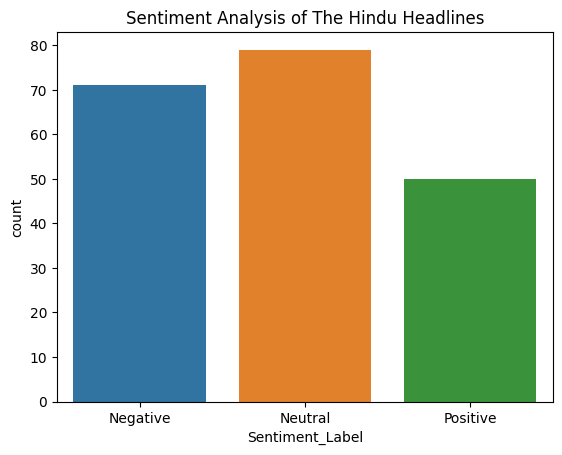

In [15]:
sns.countplot(x='Sentiment_Label', data=df)
plt.title('Sentiment Analysis of The Hindu Headlines')
plt.show()